In [15]:
from tensorflow import keras #manggil
import tensorflow as tf 
#https://keras.io/examples/vision/mnist_convnet/
width=224
height=224
depth=3
inputShape = (height, width, depth)
model = keras.Sequential( #defisini model menggunakan sequential (berurutan)
    [
        keras.Input(shape=inputShape),
        tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(7, activation="softmax"), #banyak kelas -> output layer
    ]
)

model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) #lebih dr dua 

model.load_weights("model3kedua.h5")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)      

In [ ]:
#membuat confusion matrix dan classification report

In [16]:
from keras.preprocessing.image import ImageDataGenerator

#prameter augmentasi : https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
test_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

#deklarasi lokasi folder testing dan memanggil data testing
folder_testing = "C:/Users/Alfaria/SKRIPSI/hasil_augmen/testing/BukanBurungPemakanPadi"
test_set = test_datagen.flow_from_directory(folder_testing,target_size = (224, 224),class_mode="categorical")

Found 1400 images belonging to 7 classes.


In [17]:
#mengecek enumerasi label data testing
test_set.class_indices

{'CekakakJawa': 0,
 'CiblekSawah': 1,
 'Gagak': 2,
 'Jalak': 3,
 'KuntulKerbau': 4,
 'Kutilang': 5,
 'Tekukur': 6}

In [18]:
import numpy as np
from sklearn.metrics import classification_report
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array 
import os

#mengikuti jumalah file test
n = 1400
#menampung data label asli
tampungan_y_test = []
#menampung data label hasil prediksi
tampungan_y_pred = []
x,y = test_set.next()
#perulangan untuk membaca file 1 demi 1 berurutan
for i in range(0,n):
    
    #pemanggilan file sesuai urutan
    result = os.path.dirname(test_set.filenames[i])
    filename = test_set.filenames[i]
    location = folder_testing + "/" + filename
    
    #ketika file di folder x maka di tampung, "misal x = BondolCoklat maka simpan kedalam tampungan_y_test bernilai 0"
    if (result=="CekakakJawa"):
        #print("CekakakJawa")
        tampungan_y_test.append(0)
    elif (result=="CiblekSawah"):
        #print("CiblekSawah")
        tampungan_y_test.append(1)
    elif (result=="Gagak"):
        #print("Gagak")
        tampungan_y_test.append(2)
    elif (result=="Jalak"):
        #print("Jalak")
        tampungan_y_test.append(3)
    elif (result=="KuntulKerbau"):
        #print("KuntulKerbau")
        tampungan_y_test.append(4)
    elif (result=="Kutilang"):
        #print("Kutilang")
        tampungan_y_test.append(5)
    elif (result=="Tekukur"):
        #print("Tekukur")
        tampungan_y_test.append(6)
    
    #pemanggilan data untuk melakukan prediksi, ubah ke array, expands dimensi dan augmentasi file
    test_image = image.load_img(location, target_size = (224, 224))
    test_image = image.img_to_array(test_image).astype(int)
    test_image = np.expand_dims(test_image, axis = 0)
    test_image = test_datagen.flow(test_image)
    
    #melakukan prediksi
    result = model.predict_classes(test_image)
    
    #hasil prediksi di tampung di tampungan_y_pred
    tampungan_y_pred.append(result[0])
    
#label hasil prediksi di bandingkan dengan label asli data test menghasilkan classification_report
print (classification_report(tampungan_y_test, tampungan_y_pred))
#note : perhitungan manual dan classification report bisa berbeda karena proses prediksi tidak dilakukan bersamaan 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       0.99      1.00      1.00       200
           2       1.00      1.00      1.00       200
           3       1.00      1.00      1.00       200
           4       1.00      1.00      1.00       200
           5       1.00      0.99      0.99       200
           6       1.00      1.00      1.00       200

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(tampungan_y_test, tampungan_y_pred))

0.9985714285714286


[[200   0   0   0   0   0   0]
 [  0 200   0   0   0   0   0]
 [  0   0 200   0   0   0   0]
 [  0   0   0 200   0   0   0]
 [  0   0   0   0 200   0   0]
 [  0   2   0   0   0 198   0]
 [  0   0   0   0   0   0 200]]


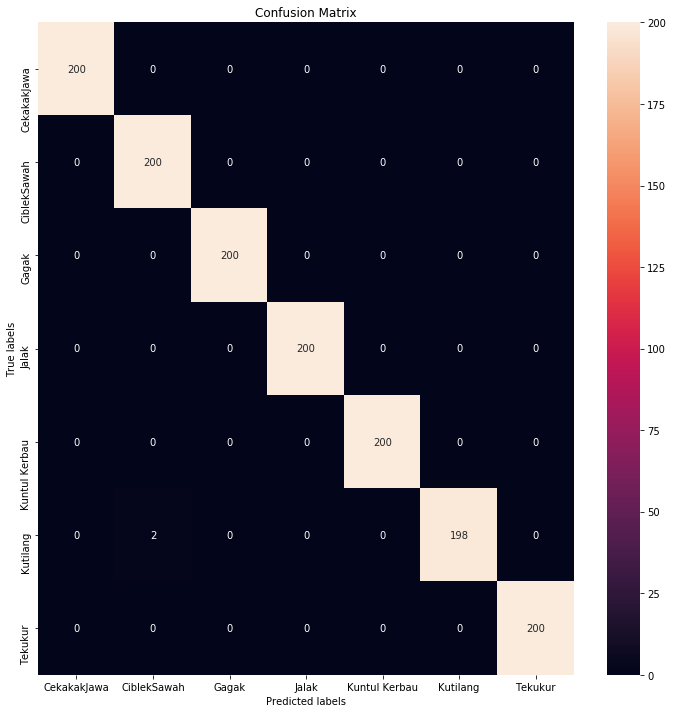

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  
labels = ['CekakakJawa', 'CiblekSawah', 'Gagak', 'Jalak', 'Kuntul Kerbau', 'Kutilang', 'Tekukur']

cf_matrix = confusion_matrix(tampungan_y_test, tampungan_y_pred)
print(cf_matrix)

#plot data
a4_dims = (12, 12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [21]:
#label / Class Asli
print(tampungan_y_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [22]:
#label / Class Hasil Prediksi
print(tampungan_y_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [2]:
#prediksi gambar menggunakan tombol upload

In [13]:
from ipywidgets import Button
from tkinter import Tk, filedialog
from IPython.display import clear_output, display

def select_files(b):
    clear_output()
    root = Tk()
    root.withdraw() # Hide the main window.
    root.call('wm', 'attributes', '.', '-topmost', True) # Raise the root to the top of all windows.
    b.files = filedialog.askopenfilename(multiple=True) # List of selected files will be set button's file attribute.
    print(b.files) # Print the list of files selected.

fileselect = Button(description="File select")
fileselect.on_click(select_files)
display(fileselect)

('C:/Users/Alfaria/SKRIPSI/hasil_augmen/testing/BukanBurungPemakanPadi/Tekukur/Tekukur_original_tekukur1.jpg_8e2a49af-7cee-448b-a2b0-82063b16430e.jpg',)


In [14]:
#setelah upload gambar baru jalanin ini
#doc : https://www.tensorflow.org/tutorials/images/classification

import glob
import numpy as np
files = fileselect.files

#doc : https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_image = image.load_img(files[0], target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = datagen.flow(test_image)
result = model.predict_classes(test_image)
class_names = ['CekakakJawa', 'CiblekSawah', 'Gagak', 'Jalak', 'KuntulKerbau', 'Kutilang', 'Tekukur']
print("===========")
print("Gambar ini : ", files[0])
print("termasuk class = ", class_names[result[0]])

Gambar ini :  C:/Users/Alfaria/SKRIPSI/hasil_augmen/testing/BukanBurungPemakanPadi/Tekukur/Tekukur_original_tekukur1.jpg_8e2a49af-7cee-448b-a2b0-82063b16430e.jpg
termasuk class =  Tekukur
